<h3 style= "color: orange; text-align: center;"> Deep Learning Models <br> 
    <p style="text-align: center;"> Handwritten digits recognition tasks and Facial Recongnition tasks.
        <br> </p> <p style="text-align: center;">Summer 2023</p> <h3>

## Task 02

* Design and evaluate two different Deep Neural Network (DNN) models using ReLU and ELU
activation functions considering the following criteria for handwritten digits recognition tasks.

In [302]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1, 784)).astype('float32') / 255.0
x_test = x_test.reshape((-1, 784)).astype('float32') / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


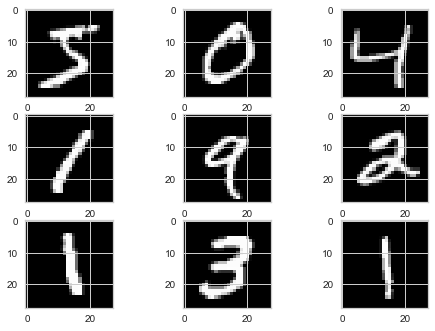

In [424]:
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

# plot first few images
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

<h3 style = "background-color:blue;color:yellow;" > Model 1 (Activation functions: ReLU)</h3>

In [513]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


# Load train and test dataset
def load_dataset():
    # Load dataset
    (trainX, trainY), (testX, testY) = mnist.load_data()
    # Reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0], 784))
    testX = testX.reshape((testX.shape[0], 784))
    # One hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY
    

In [418]:

# Scale pixels 
def prep_pixels(train, test):
    # Convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # Normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # Return normalized images
    return train_norm, test_norm



In [419]:
def define_model():
    # Define the DNN model
    model1 = Sequential([
        Dense(500, activation='relu', input_shape=(784,)),
        Dense(250, activation='relu'),
        Dense(100, activation='relu'),
        Dense(10, activation='softmax')
    ])
    # Compile the model
    model1.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model1



In [730]:
def evaluate_model(trainX, trainY, testX, testY):
    # Train the model
    batch_size = 32  # Choose 16, 32, or 64
    epochs = 50
    model1 = define_model()
    history = model1.fit(trainX, trainY, batch_size=batch_size, epochs=epochs, validation_data=(testX, testY))
    # Evaluate the model
    _, acc = model1.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))
    # Store accuracy
    scores.append(acc)
    histories.append(history)
    return scores, histories, history, model1


In [731]:
def summarize_performance(scores):
    # Summarize model performance
    print("Accuracy: mean=%.3f, std=%.3f" % (np.mean(scores) * 100, np.std(scores) * 100))



In [732]:
def test(model1):
    # Evaluate the first model
    y_pred_model1 = model1.predict(testX)
    y_pred_labels_model1 = np.argmax(y_pred_model1, axis=1)
    y_true_labels = np.argmax(testY, axis=1)

    accuracy_model1 = accuracy_score(y_true_labels, y_pred_labels_model1)
    print("The accuracy of Model", accuracy_model1)

    precision_model1 = precision_score(y_true_labels, y_pred_labels_model1, average='weighted')
    print("The Precision of Model",precision_model1)

    recall_model1 = recall_score(y_true_labels, y_pred_labels_model1, average='weighted')
    print("The Recall of Model",recall_model1)

    f1_score_model1 = f1_score(y_true_labels, y_pred_labels_model1, average='weighted')
    print("The F1-score of Model",f1_score_model1)
    
    

In [733]:
# Run the test harness for evaluating a model
def run_test_harness():
    # Load dataset
    trainX, trainY, testX, testY = load_dataset()

    # Prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)

    # Evaluate model
    return evaluate_model(trainX, trainY, testX, testY)

    

# Entry point, run the test harness
scores = []
histories = []
scores, histories, history, model1 = run_test_harness()
# Summarize estimated performance
summarize_performance(scores)

test(model1)

Epoch 1/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1943 - accuracy: 0.9409 - val_loss: 0.1071 - val_accuracy: 0.9657
Epoch 2/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0896 - accuracy: 0.9718 - val_loss: 0.0871 - val_accuracy: 0.9728
Epoch 3/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0631 - accuracy: 0.9808 - val_loss: 0.0714 - val_accuracy: 0.9767
Epoch 4/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0483 - accuracy: 0.9853 - val_loss: 0.0780 - val_accuracy: 0.9779
Epoch 5/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0392 - accuracy: 0.9875 - val_loss: 0.0662 - val_accuracy: 0.9820
Epoch 6/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0324 - accuracy: 0.9904 - val_loss: 0.0744 - val_accuracy: 0.9795
Epoch 7/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0291 - accuracy: 0.9909 - val_loss: 0.0908 - val_ac

<AxesSubplot:>

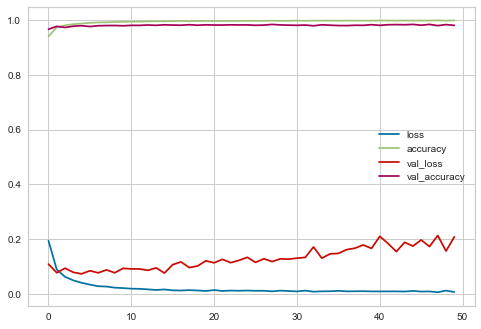

In [711]:
history1 = pd.DataFrame(history.history)
history1.plot()

In [484]:
print(classification_report(y_true_labels, y_pred_labels_model1,target_names=['0','1','2','3','4','5','6','7','8','9']))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.96      0.98      0.97       892
           6       0.99      0.97      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



 <h3  style = "background-color:blue;color:yellow;" > Model 2 ( Activation functions: ELU)</h3> 

In [8]:
from tensorflow.keras.models import Sequential

In [9]:
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import to_categorical

In [533]:
# Define the second DNN model
model2 = Sequential([
    Dense(500, input_shape=(784,)),
    Activation('elu'),
    Dense(250),
    Activation('elu'),
    Dense(100),
    Activation('elu'),
    Dense(10, activation='softmax')
])

# Compile the second model
model2.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy'])

# Train the second model
batch_size = 32  # You can choose 16, 32, or 64
epochs = 50
model2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

# Evaluate the first model
loss, accuracy = model2.evaluate(x_test, y_test)
print("Model 2 - Test Loss:", loss)
print("Model 2 - Test Accuracy:", accuracy)


Epoch 1/50
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2211 - accuracy: 0.9319 - val_loss: 0.1569 - val_accuracy: 0.9500
Epoch 2/50
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1140 - accuracy: 0.9647 - val_loss: 0.1070 - val_accuracy: 0.9656
Epoch 3/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0852 - accuracy: 0.9736 - val_loss: 0.1017 - val_accuracy: 0.9688
Epoch 4/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0666 - accuracy: 0.9788 - val_loss: 0.0939 - val_accuracy: 0.9747
Epoch 5/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0570 - accuracy: 0.9825 - val_loss: 0.0889 - val_accuracy: 0.9751
Epoch 6/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0486 - accuracy: 0.9847 - val_loss: 0.0811 - val_accuracy: 0.9790
Epoch 7/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0442 - accuracy: 0.9865 - val_loss: 0.1058 - val_ac

In [534]:
#### Evaluate the second model
y_pred_model2 = model2.predict(x_test)
y_pred_labels_model2 = np.argmax(y_pred_model2, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

accuracy_model2 = accuracy_score(y_true_labels, y_pred_labels_model2)
print("The accuracy of Model2", accuracy_model2)


precision_model2 = precision_score(y_true_labels, y_pred_labels_model2, average='weighted')
print("The Precision of Model2",precision_model2)

recall_model2 = recall_score(y_true_labels, y_pred_labels_model2, average='weighted')
print("The Recall of Model2",recall_model2)

f1_score_model2 = f1_score(y_true_labels, y_pred_labels_model2, average='weighted')
print("The F1-score of Model2",f1_score_model2)

313/313 [==============================] - 2s 5ms/step
The accuracy of Model2 0.981
The Precision of Model2 0.981052890469699
The Recall of Model2 0.981
The F1-score of Model2 0.9809923354992265


In [486]:
print(classification_report(y_true_labels, y_pred_labels_model2,target_names=['0','1','2','3','4','5','6','7','8','9']))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.99      0.95      0.97       892
           6       0.98      0.99      0.98       958
           7       0.99      0.96      0.98      1028
           8       0.95      0.99      0.97       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [547]:
# Compute the ROC curve for each class (since it's a multi-class problem)
fpr = dict()
tpr = dict()
roc_auc = dict()

# Number of classes
num_classes = 10

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_model2[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


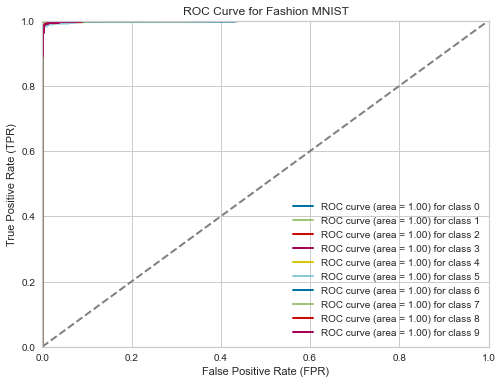

In [548]:
# Plot the ROC curves
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Fashion MNIST')
plt.legend(loc='lower right')
plt.show()


In [541]:
 history2 = model2.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0180 - accuracy: 0.9969 - val_loss: 0.2705 - val_accuracy: 0.9806
Epoch 2/50
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0117 - accuracy: 0.9974 - val_loss: 0.2402 - val_accuracy: 0.9808
Epoch 3/50
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0132 - accuracy: 0.9977 - val_loss: 0.3108 - val_accuracy: 0.9802
Epoch 4/50
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0125 - accuracy: 0.9977 - val_loss: 0.2832 - val_accuracy: 0.9793
Epoch 5/50
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0173 - accuracy: 0.9970 - val_loss: 0.3615 - val_accuracy: 0.9821
Epoch 6/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0132 - accuracy: 0.9977 - val_loss: 0.2770 - val_accuracy: 0.9800
Epoch 7/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0159 - accuracy: 0.9975 - val_loss: 0.3069 - val_ac

<AxesSubplot:>

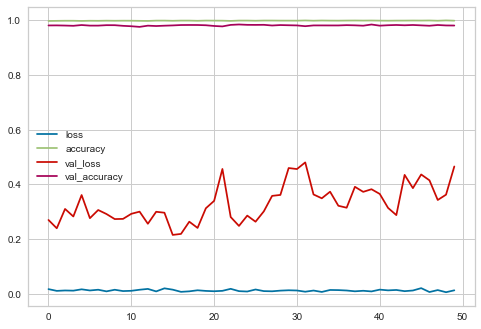

In [573]:
import pandas as pd

loss_model2 = pd.DataFrame(history2.history)
loss_model2.plot()

### Task 03

* Design and evaluate Deep Convolutional Neural Network (DCNN) model task considering the
following criteria for facial expression recognition

In [425]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [426]:
from tensorflow.keras.utils import load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D
from keras.layers import Flatten
from keras.layers import Conv1D, Conv2D, Conv3D
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import MaxPooling2D, AveragePooling2D
from keras.models import Model, Sequential
#from tensorflow.python.keras.optimizer_v2.adam import Adam
#from keras.optimizers import adam_v2
from tensorflow.keras.optimizers import RMSprop
#from keras.optimizers import rmsprop
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
#, SGD,RMSpro

In [427]:
picture_size = 48
folder_path_train = "D:/DATA_SCIENCE_MASTERS/Code/Training/"

In [428]:
picture_size = 48
folder_path_test = "D:/DATA_SCIENCE_MASTERS/Code/Testing/"

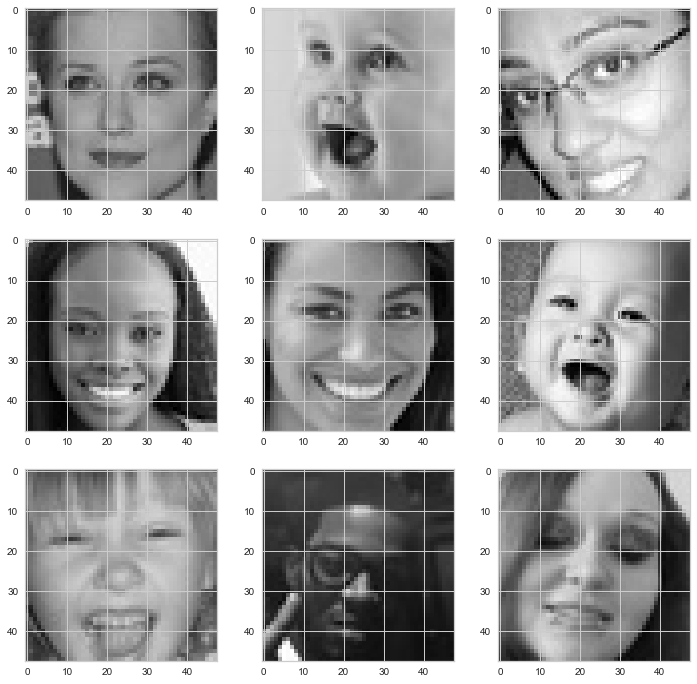

In [429]:
expression = 'happy'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"/"+expression+"/"+
                  os.listdir(folder_path + "/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()


In [441]:
tf = ImageDataGenerator(
    rescale=1./255,          # Rescale pixel values to [0, 1]
    rotation_range=10,       # Randomly rotate images by 10 degrees
    width_shift_range=0.1,   # Randomly shift the width of images by 10%
    height_shift_range=0.1,  # Randomly shift the height of images by 10%
    shear_range=0.2,         # Apply shear transformation with maximum shear of 20%
    zoom_range=0.2,          # Randomly zoom into images by 20%
    horizontal_flip=True,    # Randomly flip images horizontally
    fill_mode='nearest'      # Fill any newly created pixels after rotation or shifting
)


In [442]:
import tensorflow as tf

train_dataset = tf.keras.utils.image_dataset_from_directory(
  'Training',
  validation_split=0.8,
  subset="training",
  seed=123,
  image_size=(48, 48),
  batch_size=64,
  class_names= ['Angry', 'Fear', 'Happy', 'Neutral', 'Sad', 'Suprise'], 
  color_mode="grayscale",
  label_mode='categorical')



validataion_dataset = tf.keras.utils.image_dataset_from_directory(
  'Training',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(48, 48),
  batch_size=64,
  class_names= ['Angry', 'Fear', 'Happy', 'Neutral', 'Sad', 'Suprise'],
  color_mode="grayscale",
  label_mode='categorical')



for x, y in train_dataset.take(1):
    print(x.shape, y.shape)

    

Found 28273 files belonging to 6 classes.
Using 5655 files for training.
Found 28273 files belonging to 6 classes.
Using 5654 files for validation.
(64, 48, 48, 1) (64, 6)


In [446]:
# Set the path to your training dataset
train_data_dir = 'Training'

In [448]:
# Set the desired input image size
input_size = (48, 48)

# Set the batch size
batch_size = 64


In [450]:
# Create an ImageDataGenerator instance for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Rescale pixel values to [0, 1]
    rotation_range=10,       # Randomly rotate images by 10 degrees
    width_shift_range=0.1,   # Randomly shift the width of images by 10%
    height_shift_range=0.1,  # Randomly shift the height of images by 10%
    shear_range=0.2,         # Apply shear transformation with maximum shear of 20%
    zoom_range=0.2,          # Randomly zoom into images by 20%
    horizontal_flip=True,    # Randomly flip images horizontally
    fill_mode='nearest'      # Fill any newly created pixels after rotation or shifting
)

# Load and augment the training dataset using the ImageDataGenerator
train_dataset = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=input_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=True
)

# Load the validation dataset
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=input_size,
    batch_size=batch_size,
    class_names=['Angry', 'Fear', 'Happy', 'Neutral', 'Sad', 'Suprise'],
    color_mode='grayscale',
    label_mode='categorical'
)


Found 28273 images belonging to 6 classes.
Found 28273 files belonging to 6 classes.
Using 5654 files for validation.


In [626]:
# Define the number of classes
no_of_classes = 6
model = Sequential()
# 1st CNN layer
model.add(Conv2D(16, (3, 3), padding='same', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd CNN layer
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd CNN layer
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th CNN layer
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Fully connected 1st layer
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Dropout(0.25))

# Softmax output layer
model.add(Dense(no_of_classes, activation='softmax'))

opt = Adam(learning_rate=0.01)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_132 (Conv2D)         (None, 48, 48, 16)        160       
                                                                 
 batch_normalization_182 (Ba  (None, 48, 48, 16)       64        
 tchNormalization)                                               
                                                                 
 activation_139 (Activation)  (None, 48, 48, 16)       0         
                                                                 
 max_pooling2d_103 (MaxPooli  (None, 24, 24, 16)       0         
 ng2D)                                                           
                                                                 
 dropout_55 (Dropout)        (None, 24, 24, 16)        0         
                                                                 
 conv2d_133 (Conv2D)         (None, 24, 24, 32)      

In [627]:
# Assuming you have your training data and labels in X_train and y_train, respectively
# Specify the number of epochs and batch size
epochs = 50

# Fit the model
model.fit(train_dataset,
          epochs=epochs,
          validation_data=validataion_dataset)


Epoch 1/50
442/442 [==============================] - 36s 80ms/step - loss: 1.7341 - accuracy: 0.2860 - val_loss: 80.0397 - val_accuracy: 0.1779
Epoch 2/50
442/442 [==============================] - 35s 79ms/step - loss: 1.5500 - accuracy: 0.3780 - val_loss: 23.6905 - val_accuracy: 0.2075
Epoch 3/50
442/442 [==============================] - 36s 82ms/step - loss: 1.4485 - accuracy: 0.4206 - val_loss: 14.5275 - val_accuracy: 0.1717
Epoch 4/50
442/442 [==============================] - 37s 84ms/step - loss: 1.3920 - accuracy: 0.4505 - val_loss: 19.4015 - val_accuracy: 0.2395
Epoch 5/50
442/442 [==============================] - 37s 85ms/step - loss: 1.3622 - accuracy: 0.4698 - val_loss: 30.9726 - val_accuracy: 0.1808
Epoch 6/50
442/442 [==============================] - 37s 85ms/step - loss: 1.3373 - accuracy: 0.4770 - val_loss: 16.3863 - val_accuracy: 0.1977
Epoch 7/50
442/442 [==============================] - 38s 85ms/step - loss: 1.3186 - accuracy: 0.4887 - val_loss: 26.3531 - val_ac

In [628]:
test_data_dir ='Testing'

In [629]:
# Create an ImageDataGenerator instance for data augmentation
test_datagen = ImageDataGenerator(
    rescale=1./255,          # Rescale pixel values to [0, 1]
    rotation_range=10,       # Randomly rotate images by 10 degrees
    width_shift_range=0.1,   # Randomly shift the width of images by 10%
    height_shift_range=0.1,  # Randomly shift the height of images by 10%
    shear_range=0.2,         # Apply shear transformation with maximum shear of 20%
    zoom_range=0.2,          # Randomly zoom into images by 20%
    horizontal_flip=True,    # Randomly flip images horizontally
    fill_mode='nearest'      # Fill any newly created pixels after rotation or shifting
)

# Load and augment the training dataset using the ImageDataGenerator
test_dataset = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=input_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=True
)

Found 7067 images belonging to 6 classes.


In [630]:
# Evaluating the model on the test data
score = model.evaluate(test_dataset, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.1446704864501953
Test accuracy: 0.5464836359024048


In [631]:
from sklearn.metrics import classification_report

In [632]:
predIdxs = model.predict_generator(test_dataset)

predIdxs = np.argmax(predIdxs, axis=1)

print(classification_report(test_dataset.labels, predIdxs,
                            target_names=['Angry', 'Fear', 'Happy', 'Neutral', 'Sad', 'Suprise']))

              precision    recall  f1-score   support

       Angry       0.12      0.05      0.07       958
        Fear       0.14      0.07      0.09      1024
       Happy       0.25      0.24      0.25      1774
     Neutral       0.17      0.30      0.22      1233
         Sad       0.17      0.23      0.20      1247
     Suprise       0.11      0.08      0.09       831

    accuracy                           0.18      7067
   macro avg       0.16      0.16      0.15      7067
weighted avg       0.17      0.18      0.17      7067



In [633]:
# Make predictions on the test data
y_pred_probs_DCNN = model.predict(test_dataset)

221/221 [==============================] - 5s 24ms/step


In [634]:
# Get the true labels for the test data
y_test = test_dataset.classes
y_true = tf.keras.utils.to_categorical(y_test, num_classes=no_of_classes)


In [635]:
# Compute the ROC curve for each class (since it's a multi-class problem)
fpr = dict()
tpr = dict()
roc_auc = dict()

# Number of classes
num_classes = 6

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred_probs_DCNN[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


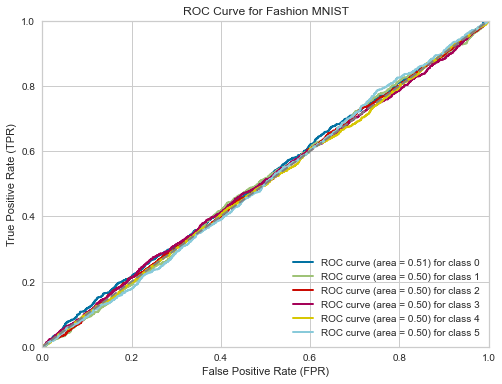

In [636]:
# Plot the ROC curves
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Fashion MNIST')
plt.legend(loc='lower right')
plt.show()
